<a href="https://colab.research.google.com/github/leejaehyeong1/machine_learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
perch_length = np.array(
      [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]
       )
perch_weight = np.array(
       [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]
       )

from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트를 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


perch_length와 perch_weight가 1차원 배열이기 때문에 이를 나눈 train_input, test_input도 1차원 배열임.

그런데 사이킷런에서 사용할 훈련세트는 2차원 배열이어야 함. 따라서 1차원 배열을 1개 열이 있는 2차원 배열로 바꿔야 함. 이때 reshape() 함수를 이용함

크기가 (3, )인 1차원 배열 [1,2,3]을 크기가 (3,1)인 2차원 배열로 바꾸면(reshape하면) 아래처럼 됨

 [1,2,3] -->

[ [1],

  [2],

  [3] ]

파이썬에서는 1차원 배열의 크기는 원소가 1개인 튜플로 나타냄. 그래서 [1,2,3] 의 크기는 (3, ) 임. 이것을 2차원 배열로 만들기 위해 하나의 열을 억지로 추가했음. 그래서 크기가 (3,1) 이 되는 것임

reshape() 는 넘파이 배열 크기를 바꿀 수 있는 메쏘드임. reshape(-1,1)에서 -1은 원소 개수를 다른 디멘션에 따라서 알아서 정하라는 의미이고, 두번째 파라미터 1은 (배열의 두번째 인덱스가 나타내는) 열 갯수를 1로 만들라는 것임. 즉 2차원 배열을 만들되, 열의 갯수가 1(두번째  파라미터)이면, 나머지인 행(첫 파라미터)는 3이 되어야 함. 이전 배열의 전체 원소 개수가 3이기 때문임. 따라서 reshape(-1,1) 하면 위 그림처럼 됨  

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


sklearn.linear_model 패키지 아래에 있는 LinearRegression 클래스에 선형회귀 알고리듬이 구현되어 있음. 그것을 가져와서(import) lr 이라는 이름의 객체를 만듦

lr.fit(train_input, train_target) 은 lr 모델에 대해 훈련시키는 메쏘드 임. 문제는 train_input(농어 길이 데이터)이고 이들의 답은 train_target(농어 무게 데이터)에 들어 있음을 알리고 훈련(학습)시키는 것임. 학습하면 길이와 무게의 상관관계를 알게 됨. 회귀 알고리듬에서는 훈련 결과물이 train_input과 train_target을 연관짓는 직선임. 찾은 직선의 기울기(coefficient)와 절편(intercept)를 보려면 print(lr.coef_, lr.intercept_)  하면 됨    

In [3]:
print(lr.predict([[50]]))

[1241.83860323]


위에서 얻어진 선형회귀 모델을 이용해 길이 50 짜리 농어의 무게를 예측해 봄

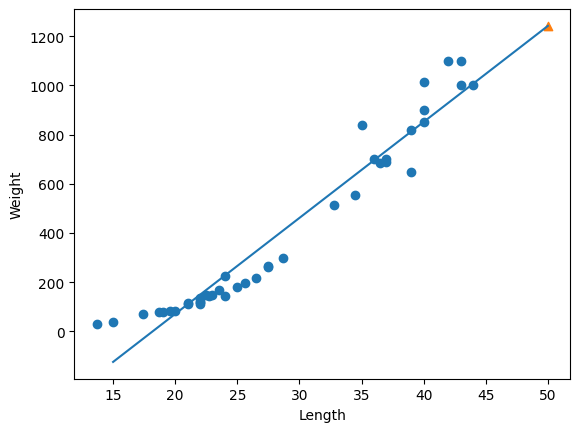

In [4]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


농어들의 길이와 무게를 분산된 점들의 그래프를 의미하는 산점도로 그려봄. 그리고 앞에서 구한 선형 방정식도 plot() 함수를 이용해 같이 그렸음.직선은 길이 15~50 센티 구간에만 보이게 그렸음.

앞서 예측해 본 길이 50센티의 농어도 삼각형으로 표현했음. 이 농어의 무게는 선형회귀 방법으로 예측한 값이므로 정확히 선 상에 점이 위치함을 알 수 있음

In [5]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.939846333997604
0.8247503123313558


모델의 정확도 점수를 출력해 봄. 훈련 데이터에 대해서는 93%, 93점이 나왔음. 시험 데이터에 대해서는 82점이 나옴. 실제 길이 데이터가 train_input, test_input에 들어 있고 무게 데이터가 train_target, test_target에 들어 있으므로 실제 값을 직선 식으로 예측한 값과 비교하면 정확도가 구해짐. 현재 이 결과는 아주 좋지도 나쁘지도 않은 수준임. (다항회귀 방법을 쓰면 직선이 아니라 곡선으로 fitting 하므로 더 좋아질 것임)